<img src="https://github.com/amandalemette/images/blob/e011da7260c032bae5c49e56a14ad97c13b8c679/BiMaster/bimaster.png?raw=true"  width=1000 height=80 />

# Professora

 - Amanda Lemette 
	 - prof.amanda@ica.ele.puc-rio.br
	 - [Linkedin](https://www.linkedin.com/in/amanda-lemette-brand%C3%A3o-83280918b)
  - [Youtube](https://www.youtube.com/c/AmandaLemette/featured)

# Mini revisão de estatistica, Visão geral de uma base de dados


- **Plano de aula:**
- Categorização de dados
- Mini revisão de estatistica 
  - dataframe .describe()
  - Média, Mediana, Quartis
  - Usar seaborn para plotar um boxplot (Outliers)
- Seleção de acordo com regras 
  - Condicionais
  - .query()



<img src="https://github.com/amandalemette/images/blob/e011da7260c032bae5c49e56a14ad97c13b8c679/BiMaster/bimaster.png?raw=true"  width=1000 height=80 />

# Leitura de base de dados .csv

## Leitura fazendo adição de arquivos no Google Colaboratory

Para fazer a leitura de uma base de dados, primeiro precisamos adicionar essa base de dados na pasta *Arquivos* do Google Colaboratory que estamos usando.  



A base de dados que vamos utilizar é sobre resultados de partidas de futebol de 1872 a 2021. A base de dados se chama *results.csv* e foi retirada do site [Kaggle](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017) e atualizada com o nome *results_modif.csv*.

## Sobre a base de dados...

A base de dados *results.csv* inclui dados de 40838 resultados de partidas de futebol começando em 1872 até 2021. Os dados não incluem jogos olímpicos. 

Colunas de dados incluem:

- data – dia da partida
- time da casa
- time convidado
- pontuação do time da casa
- pontuação do time convidado
- classificação do torneio
- cidade onde ocorreu a partida
- país onde ocorreu a partida
- neutro - TRUE/FALSE Coluna indicando se a partida foi feita em um local neutro



**Passo a passo para adicionar um documento no Google Colaboratory:**
- No canto esquerdo da sua tela do Google Colaboratory clique no símbolo da pasta. 
- Depois, clique no símbolo para fazer upload de documento
- Selecione o documento *results.csv* que você baixou da nossa pasta no Google Drive
- Copie o caminho do documento.


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/results_modif.csv')

In [ ]:
df.head(2)

In [ ]:
df = df.dropna()

<img src="https://github.com/amandalemette/images/blob/e011da7260c032bae5c49e56a14ad97c13b8c679/BiMaster/bimaster.png?raw=true"  width=1000 height=80 />

# Categorização de dados

Com a biblioteca pandas, é possível categorizar os dados dentro de grupos através do [pandas.cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html). 

Vamos criar uma nova coluna no dataframe com o nome 'Pontuacao_casa' usando pd.cut. A coluna 'Pontuacao_casa' armazena:

- 0-5 --> para os jogos que obtiveram pontuação da casa entre 0 e 5;
- 6-10 --> para os jogos que obtiveram pontuação da casa entre 6 e 10;
- 11-15 --> para os jogos que obtiveram pontuação da casa entre 11 e 15;
- 16-20 --> para os jogos que obtiveram pontuação da casa entre 16 e 20;
- 21-31 --> para os jogos que obtiveram pontuação da casa entre 21 e 31

A imagem a seguir ilustra como aplicamos o pandas.cut().

<img src="https://github.com/amandalemette/images/blob/e5a72329ad2131403edc0be180c55442ce1de57e/BiMaster/cut.png?raw=true"  width=700 height=300 />

In [ ]:
ranges = [-1,5,10,15,20,31]
labels = ['0-5','6-10','11-15','16-20','21-31']

In [ ]:
df['Pontuacao_casa'] = pd.cut(df['home_score'],ranges,labels=labels)

Vamos Imprimir quantos jogos estão incluídos em cada grupo pertencente à Pontuacao_casa.

In [ ]:
df['Pontuacao_casa'].unique()

['0-5', '6-10', '11-15', '21-31', '16-20']
Categories (5, object): ['0-5' < '6-10' < '11-15' < '16-20' < '21-31']

In [ ]:
df['Pontuacao_casa'].value_counts()

0-5      41528
6-10      1437
11-15       96
16-20       14
21-31        6
Name: Pontuacao_casa, dtype: int64

Gerar um gráfico de pizza que transmita essas informações. 

Para gerar esse gráfico, vamos primeiro olhar um exemplo no site da biblioteca Matplotlib: [exemplo plot pie](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html).

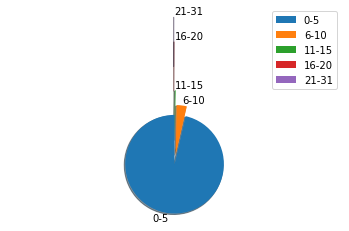

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sizes = df['Pontuacao_casa'].value_counts()
explode = (0, 0.2, 0.5, 1.5, 2.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=df['Pontuacao_casa'].value_counts().index,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.legend(df['Pontuacao_casa'].value_counts().index)
plt.show()

Esse gráfico não ficou muito bom com a biblioteca matplotlib, vamos agora conhecer uma outra biblioteca gráfica: [PLOTLY](https://plotly.com/python/pie-charts/).

In [ ]:
import plotly.express as px

In [ ]:
sizes

0-5      41528
6-10      1437
11-15       96
16-20       14
21-31        6
Name: Pontuacao_casa, dtype: int64

In [ ]:
df2 = pd.DataFrame(sizes).reset_index()
df2

In [ ]:
fig = px.pie(df2,values = 'Pontuacao_casa',names = 'index')
fig.show()

## Exercício
Faça um novo gráfico de pizza, mas dessa vez de acordo com a coluna *rs*. 
- Primeiro, use a biblioteca matplotlib
- Depois, use a plotly

<img src="https://github.com/amandalemette/images/blob/e011da7260c032bae5c49e56a14ad97c13b8c679/BiMaster/bimaster.png?raw=true"  width=1000 height=80 />

A base de dados que vamos utilizar agora é sobre tipos e especificações de carros. A base de dados se chama *FuelEfficiency.csv* e foi retirada do  [GitHub](https://downgit.github.io/#/home?url=https://github.com/amandalemette/bases_de_dados/blob/a8d8816dc4fad138dd1b4ee672f836912e0ebf52/03_FuelEfficiency/FuelEfficiency.csv).

Novamente, temos 2 modos de fazer a leitura desse arquivo:
- Adicionando ele aqui no Google Colaboratory
- Via montagem do Drive

Escolha um dos modos. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/FuelEfficiency.csv')
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


In [3]:
df.shape

(718, 9)

A base de dados FuelEfficiency tem como colunas:

- Mfr Name = empresa que fez o carro
- Carline = marca do carro
- Eng Displ = Cilindrada do motor
- Cylinders = quantos cilindros o carro possui
- Transmission = tipo de transmissão
- MPG = Miles per gallon
- CityMPG = milhas da cidade por galão
- HwyMPG = milhas rodoviárias por galão
- CombMPG = City+Hwy
- gears = número de marchas que o carro tem

<center><img src="https://github.com/amandalemette/images/blob/e9ce04a61d743ab7e5b0b50d12d902291d887ea2/BiMaster/carro.png?raw=true"  width=300 height=125 />

# Checando se tem NaN

In [4]:
df.isna().sum()

Mfr Name        0
Carline         0
Eng Displ       0
Cylinders       0
Transmission    0
CityMPG         0
HwyMPG          0
CombMPG         0
# Gears         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mfr Name      718 non-null    object 
 1   Carline       718 non-null    object 
 2   Eng Displ     718 non-null    float64
 3   Cylinders     718 non-null    int64  
 4   Transmission  718 non-null    object 
 5   CityMPG       718 non-null    int64  
 6   HwyMPG        718 non-null    int64  
 7   CombMPG       718 non-null    int64  
 8   # Gears       718 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 50.6+ KB


## Tendo uma visão geral da base de dados

Um comando muito útil para avaliar um Dataframe é o <code>.describe()</code>, que irá calcular os quartis, valores máximo, mínimo, a média e o desvio padrão. Por padrão, esse método é aplicado somente para valores numéricos.

In [6]:
df.describe()

,Eng Displ,Cylinders,CityMPG,HwyMPG,CombMPG,# Gears
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,3.092061,5.493036,20.442897,27.760446,23.139276,7.147632
std,1.344572,1.752251,5.298504,5.607924,5.368443,1.507929
min,1.400000,3.000000,9.000000,14.000000,11.000000,1.000000
25%,2.000000,4.000000,17.000000,24.000000,19.000000,6.000000
50%,3.000000,6.000000,20.000000,27.000000,23.000000,7.000000
75%,3.600000,6.000000,23.000000,31.000000,26.000000,8.000000
max,8.000000,16.000000,57.000000,59.000000,58.000000,10.000000


Um modo bastante comum de definir o espalhamento dos dados é pelos quantis. Os quantis mais importantes e empregados são:

- Quartis à dividem os dados em 4 partes iguais, sendo que cada parte contém 25 % dos dados 

- Decis àdividem os dados em décimas partes (cada parte tem 10 % dos dados)

- Percentis à dividem os dados em centésimas partes (cada parte tem 1 % dos dados)


Vemos que o describe() usa os quartis para classificar o espalhamento dos dados:

<center><img src="https://github.com/amandalemette/images/blob/00988952004cca4010e55d96f2765424d145b85d/BiMaster/quartis.png?raw=true"  width=500 height=250 />

Existe um modo gráfico de representar o espalhamento dos dados via quartis que é através do diagrama de caixa, conhecido em inglês como *BoxPlot*.

 O boxplot ou diagrama de caixa é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados, fornecendo assim um meio complementar para desenvolver uma perspectiva sobre o caráter dos dados. Além disso, o boxplot também é uma disposição gráfica comparativa.

Observe a figura do boxplot. Note que o local onde a haste vertical começa (de baixo para cima) indica o mínimo (excetuando algum possível valor extremo ou outlier) e, onde a haste termina indica o máximo (também excetuando algum possível outlier).

<center><img src="https://github.com/amandalemette/images/blob/5692d332d48e17c57616a331ece575e451436e16/BiMaster/boxplot.png?raw=true"  width=500 height=240 />

*IQR = Intervalo interquartílico.

O retângulo no meio dessa haste possui três linhas horizontais: a linha de baixo, que é o próprio contorno externo inferior do retângulo, indica o primeiro quartil. A de cima, que também é o próprio contorno externo superior do retângulo, indica o terceiro quartil. A linha interna indica o segundo quartil ou mediana.

A única informação adicional que o BoxPlot carrega de diferente em relação às informações fornecidas pelo .describe( ) é a existência de outliers, que são indicados no BoxPlot por meio de asteriscos ou pontos.

Mas você sabe o que são outliers?

Um outlier ou uma anomalia, seria um valor atípico, ou seja, uma observação que se apresenta bastante distante dos demais valores da distribuição.

Estes valores podem ser gerados por diversos fatores, uma forma mais comum é por conta de ruídos na coleta de dados ou erros de transformações..

Geralmente, classifica-se um dado como outlier quando ele está distante da média em mais do que **2 vezes o desvio padrão dos dados**. Mas isso não é uma regra rígida. Existem vários modos de identificar outliers. 



## Como interpretar o boxplot?

O boxplot nos fornece uma análise visual da posição, dispersão, simetria, caudas e valores discrepantes (outliers) do conjunto de dados.

- Posição – Em relação à posição dos dados, observa-se a linha central do retângulo (a mediana ou segundo quartil).
- Dispersão – A dispersão dos dados pode ser representada pelo intervalo interquartílico que é a diferença entre o terceiro quartil e o primeiro quartil (tamanho da caixa), ou ainda pela amplitude que é calculada da seguinte maneira: valor máximo – valor mínimo. Embora a amplitude seja de fácil entendimento, o intervalo interquartílico é uma estatística mais robusta para medir variabilidade uma vez que não sofre influência de outliers.
- Simetria – Um conjunto de dados que tem uma distribuição simétrica, terá a linha da mediana no centro do retângulo. Quando a linha da mediana está próxima ao primeiro quartil, os dados são assimétricos positivos e quando a posição da linha da mediana é próxima ao terceiro quartil, os dados são assimétricos negativos. Vale ressaltar que a mediana é a medida de tendência central mais indicada quando os dados possuem distribuição assimétrica, uma vez que a média aritmética é influenciada pelos valores extremos.
- Caudas – As linhas que vão do retângulo até aos outliers podem fornecer o comprimento das caudas da distribuição.
Outliers – Já os outliers indicam possíveis valores discrepantes. No boxplot, as observações são consideradas outliers quando estão abaixo ou acima do limite de detecção de outliers.

Vamos gerar o BoxPlot dos nossos dados armazenados em *df* utilizando a biblioteca gráfica [*Seaborn*](https://seaborn.pydata.org).

O tamanho de fonte default para gráficos considero muito pequeno, por conta disso, sempre mudo esse tamanho para 12 através do seguinte comando:

In [7]:
plt.rcParams.update({'font.size':12})

Vamos gerar o BoxPlot analisando cada empresa que manufatura carros de acordo com o atributo CombMPG que é a combinação entre milhas por galão rodadas na cidade e nas rodavias.

In [8]:
df.head(2)

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7


In [9]:
import seaborn as sns

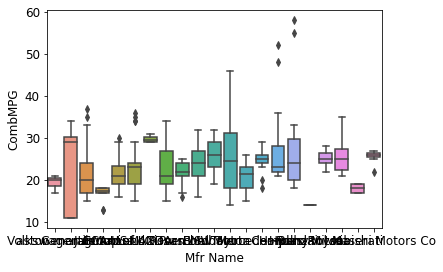

In [10]:
sns.boxplot(x='Mfr Name',y='CombMPG',data = df)
plt.show()

Como é possível observar, o gráfico ficou confuso, não é possível identificar o eixo x... Precisamos melhorar a apresentação desse gráfico. Vamos lá. 

Como primeiro passo, vamos aumentar o tamanho do gráfico. Isso é feito pelo comando


```
plt.figure(figsize = (15,5))
```

onde:
- 15 refere-se ao comprimento do gráfico
- 5 refere-se à altura do gráfico


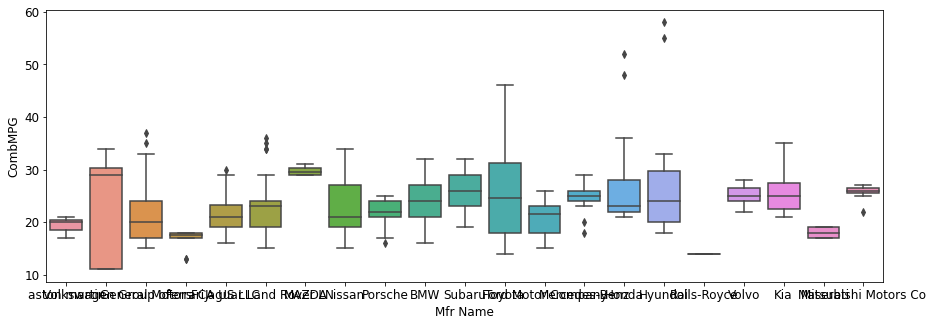

In [11]:
plt.figure(figsize = (15,5))
sns.boxplot(x='Mfr Name',y='CombMPG',data = df)
plt.show()

O tamanho agora do gráfico está adequado para apresentar o boxplot. Mas continuamos sem conseguir ler o eixo x. Uma solução é rotacionarmos o que está escrito no eixo x em 90$^o$. Isso é feito pelo código:


```
ax = sns.boxplot(x='Mfr Name',y='CombMPG',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
```

onde o grau de rotação é especificado em *rotation*.



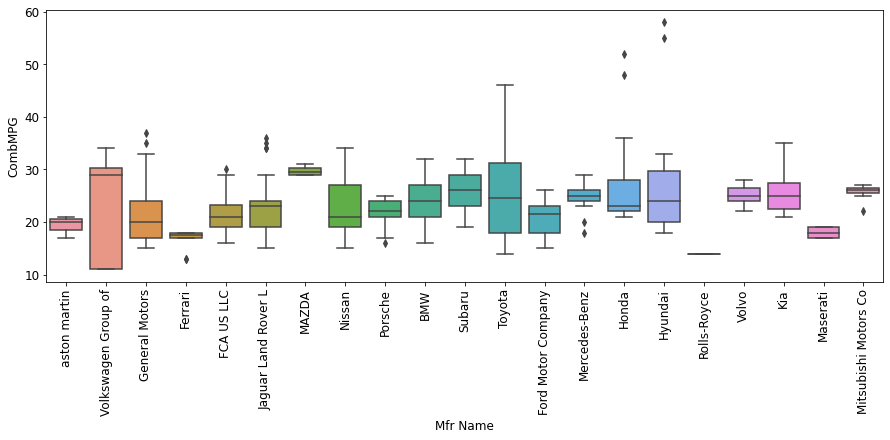

In [12]:
plt.figure(figsize = (15,5))
ax = sns.boxplot(x='Mfr Name',y='CombMPG',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Agora sim, temos um gráfico com boa apresentação. Vamos então analisá-lo.

Foram poucas as empresas que apresentaram outliers, entre elas estão:
- General Motors
- Ferrari
- FCA US LLC
- Jaguar
- Merceded-Benz
- Honda
- Mitsubishi

Vemos que a análise do carro produzido pela Rolls-Royce não é significativa, pois somente tem 1 carro produzido por ela. 

Os carros produzidor pela Volskagem e Toyota apresentam maior dispersão em relação ao atributo CombMPG, pois possuem maior IQR. Podemos ver que os carros da Volskagem não têm tanta simetria, diferentemente dos carros da Toyota que possuem mediana localizada no meio da caixa. 




Para salvar o gráfico usamos:



```
plt.savefig('nomeplot.png',dpi = 600, bbox_inches = 'tight')
```
onde:
- 'nomeplot.png' --> é possível salvar em qualquer formato: jpg, png, tiff, pdf,...
- dpi = 600 --> garante alta resolução
- bbox_inches = 'tight' --> garante que todo o gráfico será salvo e nenhuma parte ficará cortada. é importante usar esse comando quando o tamanho default dos gráficos é alterado, como foi o caso. 



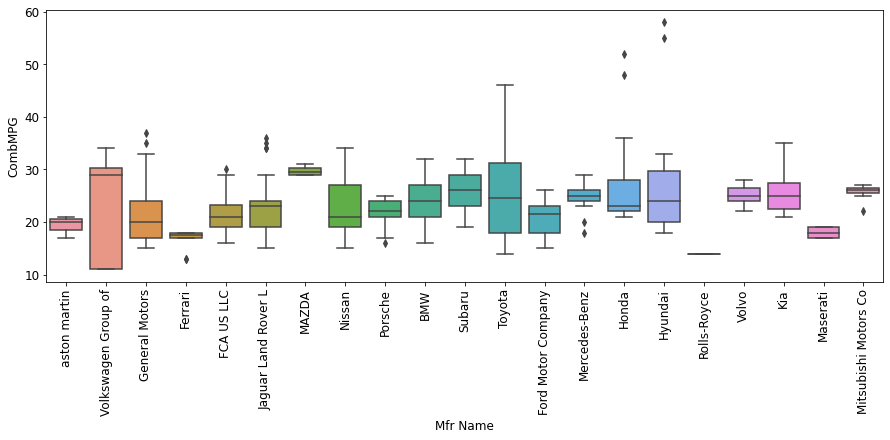

In [13]:
plt.figure(figsize = (15,5))
ax = sns.boxplot(x='Mfr Name',y='CombMPG',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.savefig('boxplot.png',dpi = 600, bbox_inches = 'tight')
plt.show()

## Exercício

Faça um diagrama de caixa utilizando os dados de *df*, mas dessa vez analisando a trasmissão (Transmission) e o combMPG.

In [45]:
df.head(1)

,Mfr_Name,Carline,Eng_Displ,Transmission,CityMPG,HwyMPG,CombMPG
0,aston martin,Vantage V8,4.0,Auto(S8),18,25,21


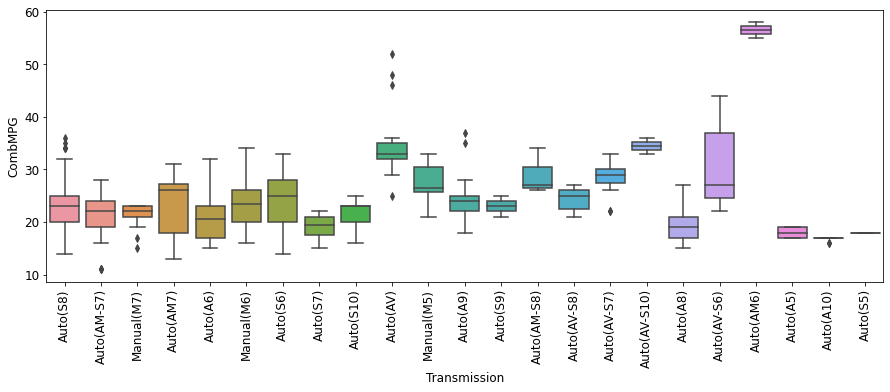

In [46]:
plt.figure(figsize = (15,5))
ax = sns.boxplot(x='Transmission',y='CombMPG',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#plt.savefig('boxplot.png',dpi = 600, bbox_inches = 'tight')
plt.show()

Existe um outro tipo de gráfico da biblioteca seaborn que de um modo mais simplificado que o boxplot mostra a dispersão dos dados em comparação com outros. Estou falando do *swarmplot*.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


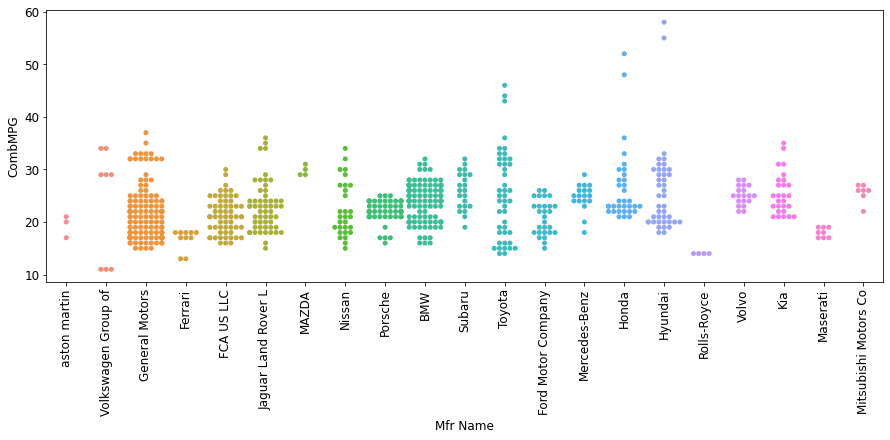

In [14]:
plt.figure(figsize = (15,5))
ax = sns.swarmplot(x='Mfr Name',y='CombMPG',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#plt.savefig('BoxPlot.png',dpi = 600, bbox_inches = 'tight')
plt.show()

Uma ferramenta interessante que pode ser usada no *swarmplot* é o *hue*, que serve para classificar os dados, vamos ver um exemplo. 

Vamos visualizar o swarmplot de Mfr Name e CombMPG, mas separando os dados de acordo com o número de cilindros (Cylinders).

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.swarmplot(x='Mfr Name',y='CombMPG',data = df,hue = 'Cylinders')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#plt.savefig('BoxPlot.png',dpi = 600, bbox_inches = 'tight')
plt.show()

Podemos ver que existe uma relação entre o número de cilindro e o quanto os carros rodam na cidade e nas rodovias em milhas por galão. Isso é um padrão para todas as fabricantes. 

<img src="https://github.com/amandalemette/images/blob/e011da7260c032bae5c49e56a14ad97c13b8c679/BiMaster/bimaster.png?raw=true"  width=1000 height=80 />

# Aplicando Filtros

Tem alguns jeitos de selecionar subconjuntos, utilizando o comando abaixo:

In [15]:
df.head(2)

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7


- Vamos selecionar todos os registros da base de dados que sigam os seguintes critérios:
  - <code>'# Gears' = 5</code> 

## Indexação booleana 

In [18]:
df[df['# Gears'] == 5]

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
137,General Motors,SPARK,1.4,4,Manual(M5),29,38,33,5
139,General Motors,SPARK ACTIV,1.4,4,Manual(M5),29,37,32,5
230,Nissan,VERSA,1.6,4,Manual(M5),27,36,30,5
332,Subaru,IMPREZA 4-Door,2.0,4,Manual(M5),24,32,27,5
334,Subaru,IMPREZA 4-Door SPORT,2.0,4,Manual(M5),23,31,26,5
428,Subaru,IMPREZA 5-Door,2.0,4,Manual(M5),24,31,26,5
430,Subaru,IMPREZA 5-Door SPORT,2.0,4,Manual(M5),22,30,25,5
448,Nissan,FRONTIER 2WD,2.5,4,Auto(A5),17,22,19,5
449,Nissan,FRONTIER 2WD,2.5,4,Manual(M5),19,23,21,5
450,Nissan,FRONTIER 2WD,4.0,6,Auto(A5),16,23,19,5


- Vamos limitar ainda mais a nossa seleção. Vamos selecionar todos os registros da base de dados que sigam os seguintes critérios:
  - <code>'# Gears' = 5</code> 
  - <code>'Mfr Name' = 'Nissan'</code> 

Repare que ambas as condições PRECISAM ser atendidas. 

In [19]:
df[(df['# Gears']==5)&(df['Mfr Name']=='Nissan')]

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
230,Nissan,VERSA,1.6,4,Manual(M5),27,36,30,5
448,Nissan,FRONTIER 2WD,2.5,4,Auto(A5),17,22,19,5
449,Nissan,FRONTIER 2WD,2.5,4,Manual(M5),19,23,21,5
450,Nissan,FRONTIER 2WD,4.0,6,Auto(A5),16,23,19,5
452,Nissan,FRONTIER 2WD FFV,4.0,6,Auto(A5),16,22,18,5
461,Nissan,FRONTIER 4WD,4.0,6,Auto(A5),15,21,17,5
463,Nissan,FRONTIER 4WD FFV,4.0,6,Auto(A5),15,21,17,5


Agora, se modificarmos o nosso critério e passarmos a considerar que apenas um dos dois critérios precisam ser atendidos?

ou seja, vamos imprimir as linhas de df que tem carros com 5 marchas ou que os carros tenham sido produzidos pela empresa Nissan. 

In [ ]:
df[(df['# Gears']==5)|(df['Mfr Name']=='Nissan')]

In [24]:
a,b = 3,4
(a<4)&(b==4)

True

## Query

 Também podemos filtrar a base de dados por meio do método [<code>.query()</code>](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html).**bold text**

 Observação: As queries em dataframes se assemelham com o que conhecemos das queries feitas em bancos de dados SQL.

Contudo, para aplicar query() precisamos eliminar espaços em branco nos nomes das colunas de dataframe, se não a query() não irá funcionar. 

### Alteração de nome de coluna

Vamos alterar os nomes das seguintes colunas de df:
- '# Gears' para Gears
- 'Mfr Name' para Mfr_Name

Para fazer isso, usamos:



```
df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
```



In [25]:
df = df.rename(columns={'# Gears': 'Gears', 'Mfr Name': 'Mfr_Name'})

In [26]:
df.columns

Index(['Mfr_Name', 'Carline', 'Eng Displ', 'Cylinders', 'Transmission',
       'CityMPG', 'HwyMPG', 'CombMPG', 'Gears'],
      dtype='object')

Vamos selecionar todos os registros da base de dados que sigam o seguinte critério (usando query):
  - <code>'Gears' = 5</code> 

In [27]:
df.query('Gears == 5') # df[df['Gears']==5]

,Mfr_Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,Gears
137,General Motors,SPARK,1.4,4,Manual(M5),29,38,33,5
139,General Motors,SPARK ACTIV,1.4,4,Manual(M5),29,37,32,5
230,Nissan,VERSA,1.6,4,Manual(M5),27,36,30,5
332,Subaru,IMPREZA 4-Door,2.0,4,Manual(M5),24,32,27,5
334,Subaru,IMPREZA 4-Door SPORT,2.0,4,Manual(M5),23,31,26,5
428,Subaru,IMPREZA 5-Door,2.0,4,Manual(M5),24,31,26,5
430,Subaru,IMPREZA 5-Door SPORT,2.0,4,Manual(M5),22,30,25,5
448,Nissan,FRONTIER 2WD,2.5,4,Auto(A5),17,22,19,5
449,Nissan,FRONTIER 2WD,2.5,4,Manual(M5),19,23,21,5
450,Nissan,FRONTIER 2WD,4.0,6,Auto(A5),16,23,19,5


- Vamos limitar ainda mais a nossa seleção. Vamos selecionar todos os registros da base de dados que sigam os seguintes critérios:
  - <code>'Gears' = 5</code> 
  - <code>'Mfr_Name' = 'Nissan'</code>

Usando query =)

In [ ]:
df.query('Gears == 5 & Mfr_Name == "Nissan"')

Agora, vamos selecionar registro que respeitem ao menos uma das duas condições:

In [ ]:
df.query('Gears == 5 | Mfr_Name == "Nissan"')

- **Algumas observações importantes**

  - Reparem que a query foi feita por meio de uma string onde passamos os nomes das colunas e os valores correspondentes. 
  - Para colocar uma string dentro da outra reparem na utilização de dois tipos de string distintos. A sting da pesquisa utilizando aspas simples e o valor específico da coluna entre aspas duplas. 
  - Para evitar mudar o nome da coluna que contém espaço, basta escrever o nome da coluna entre " " que o query irá funcionar normalmente. 

## Exercício

Selecione usando 
1. indexação booleana
2. query

os registros que têm:


```
Transmission = 'Manual(M7)

```
ou 


```
Eng displ > 6.0
```




In [30]:
df.columns

Index(['Mfr_Name', 'Carline', 'Eng Displ', 'Cylinders', 'Transmission',
       'CityMPG', 'HwyMPG', 'CombMPG', 'Gears'],
      dtype='object')

In [31]:
df = df.rename(columns={'Eng Displ':'Eng_Displ'})

In [ ]:
df[(df['Transmission']=='Manual(M7)')|(df['Eng_Displ']>6)]

In [ ]:
df.query('Transmission == "Manual(M7)" | Eng_Displ > 6')

<img src="https://github.com/amandalemette/images/blob/e011da7260c032bae5c49e56a14ad97c13b8c679/BiMaster/bimaster.png?raw=true"  width=1000 height=80 />

# Seleção de múltiplas colunas

Para fazer a seleção de múltiplas colunas do DataFrame, podemos utilizar o seguinte comando:


```
dataframe[[lista com nomes das colunas separadas por vígula]]
```



Vamos selecionar as colunas: 

'Carline', 'HwyMPG' e 'Gears'

In [34]:
df[['Carline','HwyMPG','Gears']]

,Carline,HwyMPG,Gears
0,Vantage V8,25,8
1,Chiron,14,7
2,CORVETTE,20,8
3,CORVETTE,25,8
4,CORVETTE,23,8
...,...,...,...
713,4RUNNER 4WD,20,5
714,LAND CRUISER WAGON 4WD,18,8
715,SEQUOIA 4WD,17,6
716,XC90 AWD,26,8


Vamos fazer o mesmo, mas agora fazendo referência à posição dessas colunas.

Você tem alguma sugestão de como fazer isso?

In [36]:
for i in df.columns:
  print(i)

Mfr_Name
Carline
Eng_Displ
Cylinders
Transmission
CityMPG
HwyMPG
CombMPG
Gears


In [ ]:
df.iloc[:,[1,-3,-1]]

In [43]:
df = df.drop(columns = ['Gears','Cylinders'])

In [44]:
df.columns

Index(['Mfr_Name', 'Carline', 'Eng_Displ', 'Transmission', 'CityMPG', 'HwyMPG',
       'CombMPG'],
      dtype='object')

<img src="https://github.com/amandalemette/images/blob/e011da7260c032bae5c49e56a14ad97c13b8c679/BiMaster/bimaster.png?raw=true"  width=1000 height=80 />